In [266]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from cdlib import algorithms, viz, evaluation
# import tensorflow as tf
import os

In [245]:
with open('../pkl/global_travel_tensor_sorted.pkl', 'rb') as f:
    travel_tensors_raw= pickle.load(f) 

In [246]:
travel_tensors_raw.shape

(200, 226, 452)

In [247]:
country_cutline = 30 # 69, 70 give None homogeneity
travel_tensors = travel_tensors_raw[:,0:country_cutline,0:country_cutline]

In [248]:
travel_tensors.shape

(200, 30, 30)

In [249]:
mat = np.sum(travel_tensors, 0)
v = np.reshape(mat, (len(mat)*len(mat), 1))

(array([584., 110.,  51.,  36.,  27.,  11.,  12.,   8.,   4.,   7.,   3.,
          6.,   5.,   1.,   3.,   3.,   0.,   2.,   1.,   2.,   3.,   2.,
          1.,   2.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          1.]),
 array([   0.  ,   19.62,   39.24,   58.86,   78.48,   98.1 ,  117.72,
         137.34,  156.96,  176.58,  196.2 ,  215.82,  235.44,  255.06,
         274.68,  294.3 ,  313.92,  333.54,  353.16,  372.78,  392.4 ,
         412.02,  431.64,  451.26,  470.88,  490.5 ,  510.12,  529.74,
         549.36,  568.98,  588.6 ,

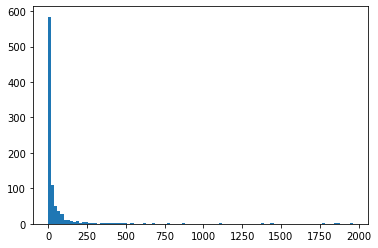

In [250]:
plt.hist(v, bins=100)

(array([167.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 733.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

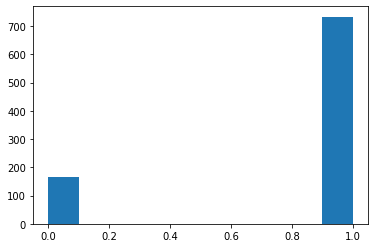

In [251]:
plt.hist(1*(v>0))

In [252]:
adj = 1*(mat>0)

In [253]:
# pd.DataFrame(adj).to_csv("../../T-GCN-master/data/travel/travel_adj.csv", index=False, header=False)

In [254]:
adj_list = []
interval = 50 # 26 * 4 weeks = 2 year,
for i in range(interval):
    ajm = np.sum(travel_tensors[4*i:4+4*i][:,0:country_cutline,0:country_cutline], axis=0)
    adj_list.append(ajm)

adj_list = np.array(adj_list)

In [255]:
np.sum(adj_list,1).shape

(50, 30)

In [256]:
np.sum(adj_list,2).shape

(50, 30)

In [257]:
v = np.sum(adj_list,1).reshape(1500)
pd.DataFrame(v).describe()

,0
count,1500.000000
mean,31.146667
std,45.898267
min,0.000000
25%,8.000000
50%,17.000000
75%,33.000000
max,476.000000


(array([181., 252., 223., 175., 112., 117.,  69.,  54.,  33.,  32.,  32.,
         20.,   9.,  16.,  17.,  14.,  18.,  16.,   6.,  15.,   3.,  13.,
          1.,   3.,   4.,   3.,   6.,   5.,   2.,   4.,   4.,   0.,   3.,
          2.,   0.,   4.,   0.,   2.,   6.,   1.,   0.,   1.,   3.,   1.,
          0.,   0.,   2.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  0.  ,   4.76,   9.52,  14.28,  19.04,  23.8 ,  28.56,  33.32,
         38.08,  42.84,  47.6 ,  52.36,  57.12,  61.88,  66.64,  71.4 ,
         76.16,  80.92,  85.68,  90.44,  95.2 ,  99.96, 104.72, 109.48,
        114.24, 119.  , 123.76, 128.52, 133.28, 138.04, 142.8 , 147.56,
        152.32, 157.08, 161.84

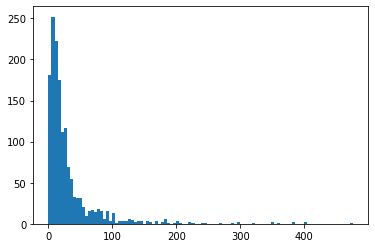

In [258]:
plt.hist(v, bins=100)

In [259]:
traffic_mat = (np.sum(adj_list,1) + np.sum(adj_list,2))

In [260]:
# pd.DataFrame(traffic_mat).to_csv("../../T-GCN-master/data/travel/travel_traffic.csv", index=False)

In [261]:
traffic_mat.shape

(50, 30)

In [262]:
traffic_mat

array([[145.,  24.,  47., ...,   7.,   9.,   5.],
       [197.,  29.,  46., ...,  17.,  11.,   9.],
       [163.,  32.,  31., ...,   7.,  11.,   9.],
       ...,
       [148.,  20.,  45., ...,  43.,   2.,  25.],
       [165.,  23.,  33., ...,  24.,   5.,  13.],
       [107.,  33.,  32., ...,  26.,   1.,   3.]])

In [274]:
pd.DataFrame(adj_list[:,12,:].reshape(50*30)).describe()

,0
count,1500.000000
mean,4.614000
std,8.757328
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,90.000000


In [264]:
v= [adj_list[:,:,28].reshape(50*30), adj_list[:,:,24].reshape(50*30), adj_list[:,:,12].reshape(50*30)]
vdf = pd.DataFrame(v)
vdf.to_csv("weight_dist.csv")

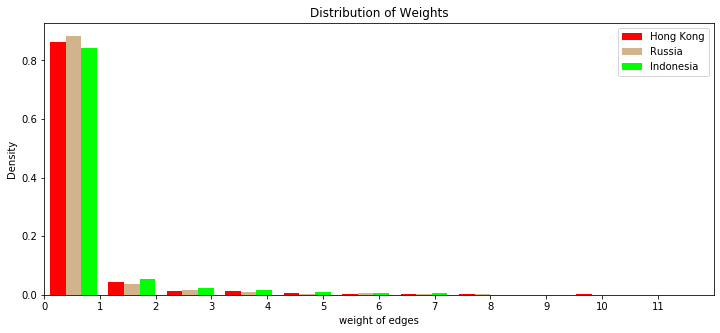

In [301]:
# bn =10 # HK: 28, ID: 12, RU: 24
plt.figure(figsize=(12,5))
x=[adj_list[:,:,28].reshape(50*30), adj_list[:,:,24].reshape(50*30), adj_list[:,:,12].reshape(50*30)]
x = np.array(x).T
colors = ['red', 'tan', 'lime']
plt.hist(x, bins=21, density=True, histtype='bar', color=colors, label=['Hong Kong','Russia','Indonesia'])
# plt.hist(adj_list[:,:,28].reshape(50*30), bins =bn, alpha=0.8)
# plt.hist(adj_list[:,:,24].reshape(50*30), bins =bn, alpha=0.5)
# plt.hist(adj_list[:,:,12].reshape(50*30), bins =bn, alpha=0.5)
# plt.axvline(2, linestyle='-', color='red')
plt.xlabel("weight of edges")
plt.xlim(0, 12)
plt.xticks(range(0,12))
plt.ylabel("Density")
plt.title("Distribution of Weights")
plt.legend()
# v = np.sum(adj_list,1).reshape(1500)

In [283]:
x=[adj_list[:,:,28].reshape(50*30), adj_list[:,:,24].reshape(50*30), adj_list[:,:,12].reshape(50*30)]

In [288]:
x = np.array(x).T

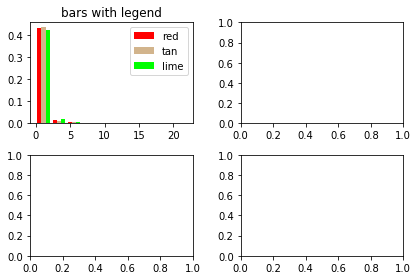

In [289]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

n_bins = 10
# x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

# ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
# ax1.set_title('stacked bar')

# ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
# ax2.set_title('stack step (unfilled)')

# # Make a multiple-histogram of data-sets with different length.
# x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
# ax3.hist(x_multi, n_bins, histtype='bar')
# ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()